### Régression avec SVM (SVR)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# 1. Génération de données synthétiques
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # 100 points entre 0 et 5
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Fonction sinusoïdale bruitée

In [6]:
X

array([[0.02761059],
       [0.10292247],
       [0.12709563],
       [0.17194261],
       [0.22613644],
       [0.23225206],
       [0.29041806],
       [0.31779175],
       [0.32525796],
       [0.37022326],
       [0.37275322],
       [0.44246251],
       [0.48836057],
       [0.53945713],
       [0.5793453 ],
       [0.59797123],
       [0.61019117],
       [0.6974693 ],
       [0.70462112],
       [0.7799726 ],
       [0.7800932 ],
       [0.85262062],
       [0.90912484],
       [0.91702255],
       [0.92427228],
       [0.97991431],
       [0.99357841],
       [0.99836891],
       [1.06169555],
       [1.29389991],
       [1.35674516],
       [1.40467255],
       [1.4561457 ],
       [1.46072324],
       [1.52121121],
       [1.52306885],
       [1.55491161],
       [1.55855538],
       [1.62591661],
       [1.62665165],
       [1.65449012],
       [1.78376663],
       [1.79232864],
       [1.83180922],
       [1.87270059],
       [1.94338645],
       [2.13770509],
       [2.159

In [8]:
y

array([ 0.03631178,  0.07284012,  0.13592982, -0.02766026,  0.20224683,
        0.26588096,  0.43414221,  0.26064263,  0.23870388,  0.31164787,
        0.45572117,  0.46104124,  0.41620271,  0.56499704,  0.55718394,
        0.6598314 ,  0.50281884,  0.60951383,  0.60853441,  0.55690845,
        0.7329577 ,  0.77911291,  0.78947765,  0.77033558,  0.65664551,
        0.78838511,  0.80371261,  0.76036086,  0.85705457,  1.00231359,
        1.16579698,  1.00369093,  1.01918985,  0.98650348,  0.80689379,
        0.99620987,  1.00589686,  1.24624929,  0.97924517,  1.02859523,
        0.99302854,  0.86053961,  1.08984419,  1.04132239,  1.0338752 ,
        0.84044885,  0.98384451,  0.69135109,  0.86673316,  0.97769835,
        0.60459397,  0.56640353,  0.62758133,  0.48963842,  0.36014357,
        0.51060126,  0.38874848,  0.46251339,  0.30486974,  0.48395778,
        0.10023179,  0.11930091,  0.22910896,  0.01251215,  0.12642772,
        0.21294948, -0.13564894, -0.02771489, -0.14419806, -0.19

In [10]:
# 2. Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 3. Normalisation des données
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [14]:
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [16]:
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

In [18]:
y_train_scaled

array([ 0.51560411, -1.41614882,  0.93741005,  1.34917166, -0.5037765 ,
        0.7303558 ,  1.20984777, -1.65970986,  0.22929748, -0.73694545,
        0.44428408,  0.77571465, -1.31847384,  1.01417253, -1.76655536,
        0.16343598, -0.41439118,  0.08726421,  1.2144259 ,  0.50440471,
        1.18778664,  0.94198798,  0.15589768, -1.77442768,  0.87502412,
        0.58224311, -1.16743675,  0.9153528 ,  0.11051872,  0.59388311,
        0.72577111, -0.25898857,  0.65794561,  1.19001261,  0.12432642,
       -1.12022219,  0.40557466, -0.03724613,  1.2283661 , -1.54425408,
        0.34025019, -1.50388009,  0.29908589,  1.2793457 ,  0.65086562,
       -0.25906719,  1.19663136, -0.42669391, -0.04750207, -1.59595635,
       -1.27048098,  1.01918773,  0.21954332,  1.02810066, -1.60491465,
        0.4464026 , -0.88234207,  1.24749556, -1.78551581,  0.47726245,
       -0.20117792, -1.51792631,  1.57424859,  1.22320954, -0.11436211,
        0.6839459 ,  0.90200952, -0.02357201,  0.88937838, -1.66

In [20]:
# 4. Entraînement du modèle SVR
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

SVR(C=100, gamma=0.1)

In [22]:
# 5. Prédiction et évaluation
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

In [24]:
# 5. Prédiction et évaluation
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

In [38]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [40]:
print(f"Erreur quadratique moyenne (MSE) : {mse:.4f}")
print(f"Score R² : {r2:.4f}")

Erreur quadratique moyenne (MSE) : 0.0078
Score R² : 0.9836


In [42]:
# 6. Visualisation des résultats
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
X_plot_scaled = scaler_X.transform(X_plot)
y_plot_scaled = svr_model.predict(X_plot_scaled)
y_plot = scaler_y.inverse_transform(y_plot_scaled.reshape(-1, 1)).ravel()

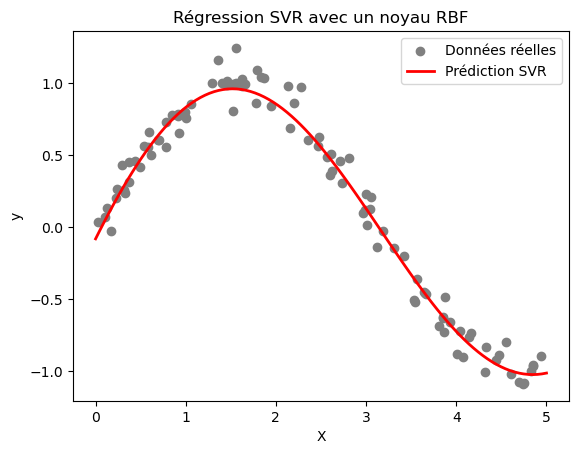

In [44]:
plt.scatter(X, y, color="gray", label="Données réelles")
plt.plot(X_plot, y_plot, color="red", lw=2, label="Prédiction SVR")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Régression SVR avec un noyau RBF")
plt.legend()
plt.show()